In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel("/Users/mahmoudalkheja/Desktop/Analytics Consulting/Case studies from Group C-20230324/Crisk.xls")

In [6]:
data = data.rename(columns={'MORTAGE': 'MORTGAGE'})

In [4]:
data.head(n = 10)

,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,MORTGAGE,LOANS,RISK
0,23,21035,f,single,1,1,monthly,n,1,bad risk
1,35,53201,m,married,0,1,monthly,y,0,good risk
2,29,21002,f,married,2,3,quarterly,y,2,bad risk
3,23,20828,f,married,1,0,quarterly,y,2,bad risk
4,42,46965,f,married,1,1,monthly,y,1,good risk
5,29,31519,f,single,0,1,monthly,y,0,good risk
6,22,21232,f,married,2,2,quarterly,y,2,bad risk
7,22,22659,m,single,1,3,quarterly,n,1,bad risk
8,41,29860,m,divsepwid,2,5,quarterly,n,3,good risk
9,40,28714,m,divsepwid,3,5,quarterly,n,2,bad risk


In [7]:
data = data.astype({'GENDER':'category', 'MARITAL':'category', 'HOWPAID':'category','MORTGAGE':'category','RISK':'category','LOANS':'category','NUMKIDS':'category','NUMCARDS':'category'})


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   AGE       4017 non-null   int64   
 1   INCOME    4017 non-null   int64   
 2   GENDER    4017 non-null   category
 3   MARITAL   4017 non-null   category
 4   NUMKIDS   4017 non-null   category
 5   NUMCARDS  4017 non-null   category
 6   HOWPAID   4017 non-null   category
 7   MORTGAGE  4017 non-null   category
 8   LOANS     4017 non-null   category
 9   RISK      4017 non-null   category
dtypes: category(8), int64(2)
memory usage: 95.6 KB


In [56]:
data.groupby('RISK')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
RISK,,,,,,,,
bad risk,3238.0,30.731624,10.14525,18.0,22.0,26.0,41.0,50.0
good risk,779.0,36.218228,7.17240,18.0,31.0,36.0,42.0,50.0


In [57]:
data.groupby('RISK')['INCOME'].describe()

,count,mean,std,min,25%,50%,75%,max
RISK,,,,,,,,
bad risk,3238.0,23522.106547,6803.182893,15005.0,20107.0,22775.0,24706.75,59692.0
good risk,779.0,34163.869063,10604.599231,15045.0,26042.0,32363.0,42453.50,59944.0


# EDA 

In [43]:
for var in continuous_va:
    sns.set_style("white")
    plt.figure()
    ax = sns.violinplot(data=data, x='RISK', y=var, inner='quartile')
    plt.title(f"{var} V.S RISK")

    # Calculate the means for each risk group and add them to the plot
    bad_risk_mean = data[data['RISK'] == 'bad risk'][var].mean()
    good_risk_mean = data[data['RISK'] == 'good risk'][var].mean()
    ax.annotate(f'Average: {bad_risk_mean:.2f}', xy=(0, bad_risk_mean), xytext=(-0.35, bad_risk_mean),
                fontsize=11, color='red', backgroundcolor='white', bbox=dict(facecolor='white', alpha=0.5))
    ax.annotate(f'Average: {good_risk_mean:.2f}', xy=(1, good_risk_mean), xytext=(0.65, good_risk_mean),
                fontsize=11, color='blue', backgroundcolor='white', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()


NameError: name 'continuous_va' is not defined

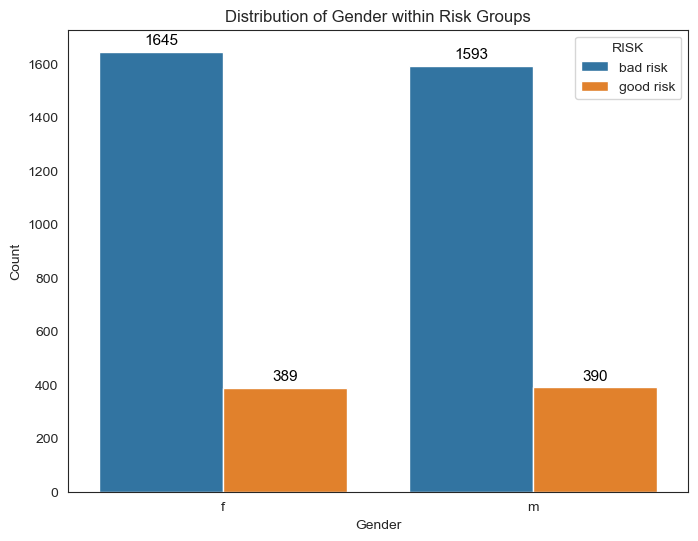

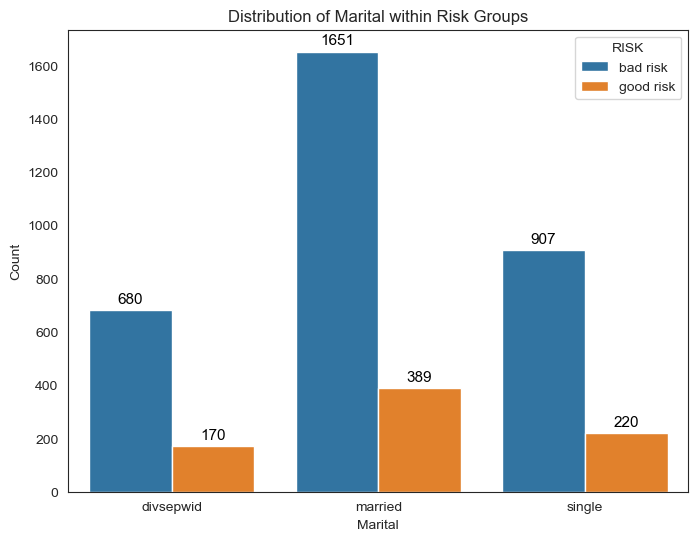

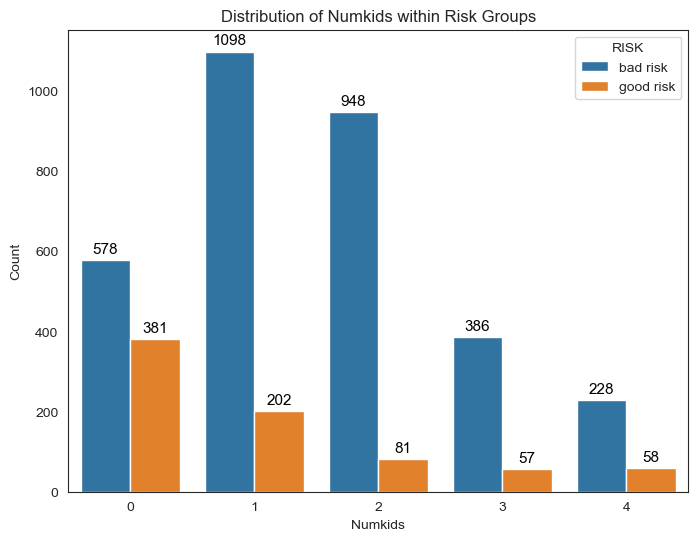

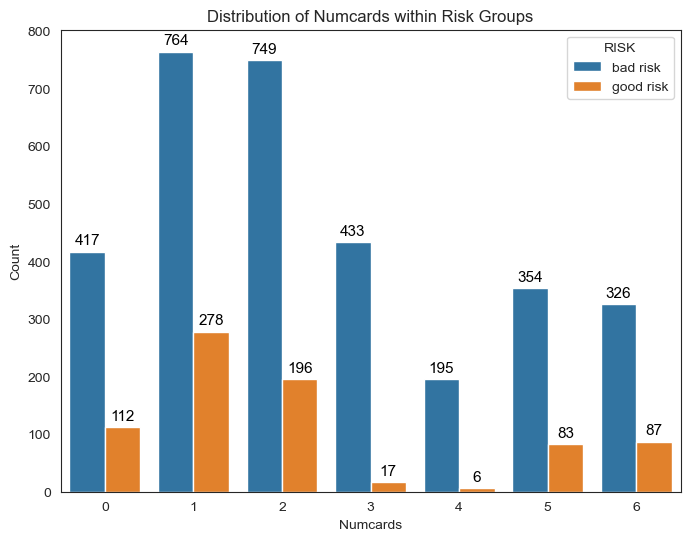

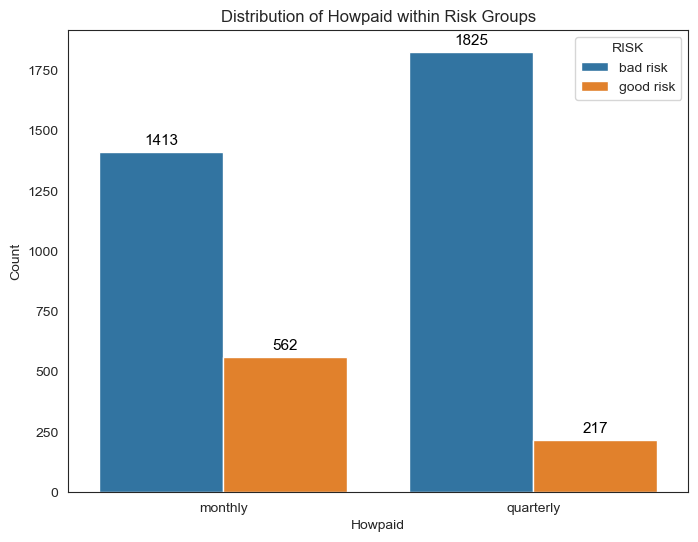

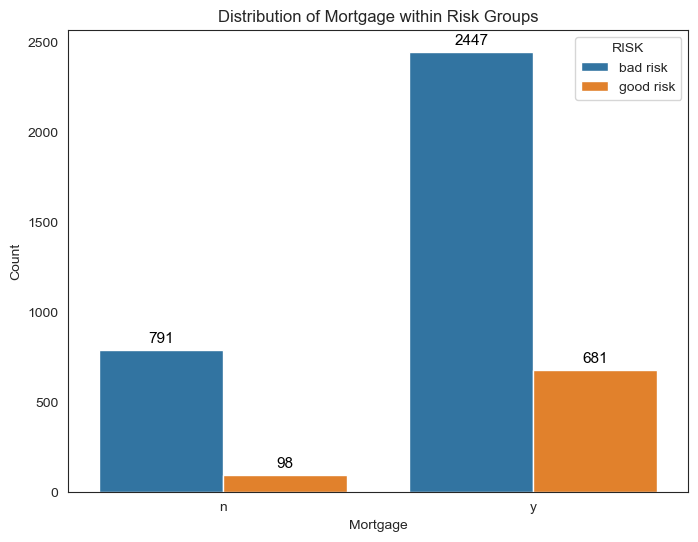

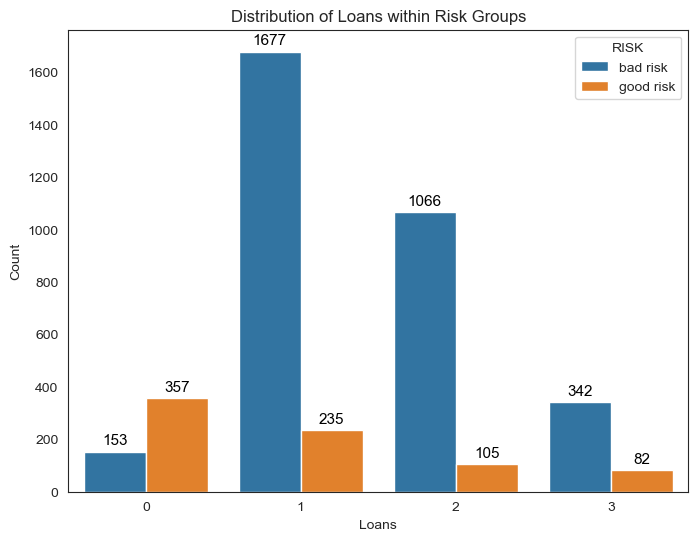

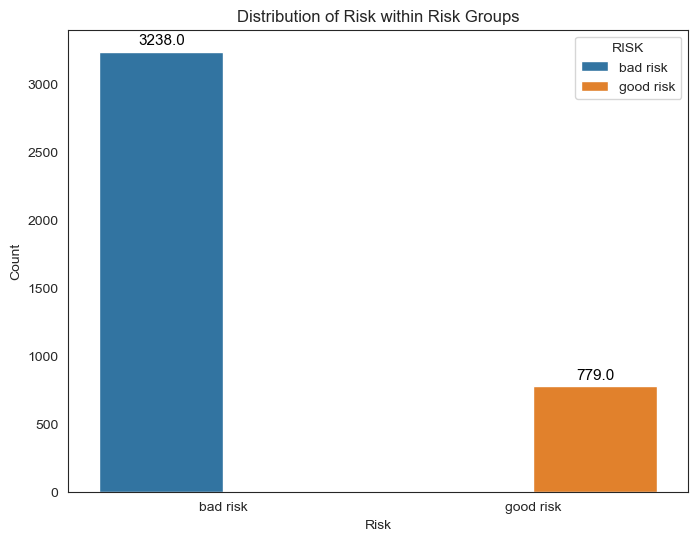

In [42]:
categorical_vars1 = ['GENDER', 'MARITAL','NUMKIDS','NUMCARDS','HOWPAID', 'MORTGAGE','LOANS','RISK']

def plot_categorical_var(var):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=var, hue='RISK', data=data)
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {var.capitalize()} within Risk Groups')

    # Add frequency values on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

for var in categorical_vars1:
    plot_categorical_var(var)


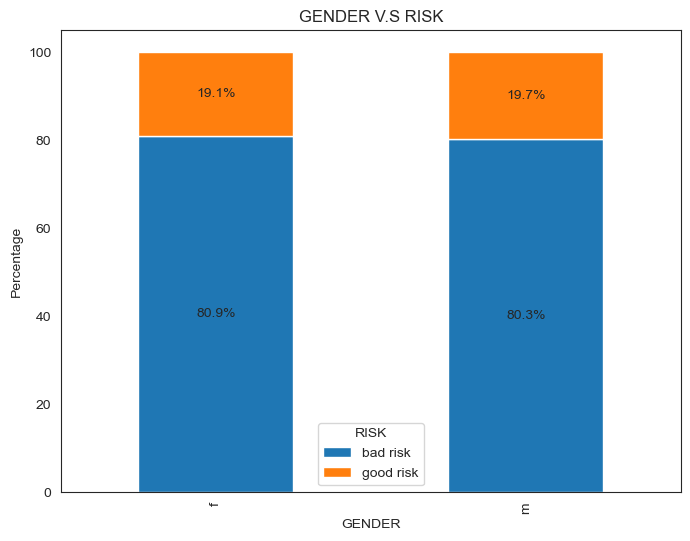

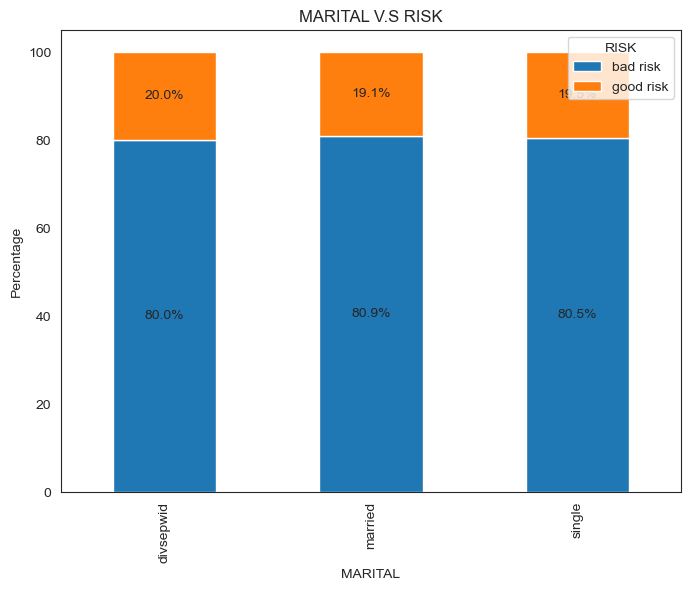

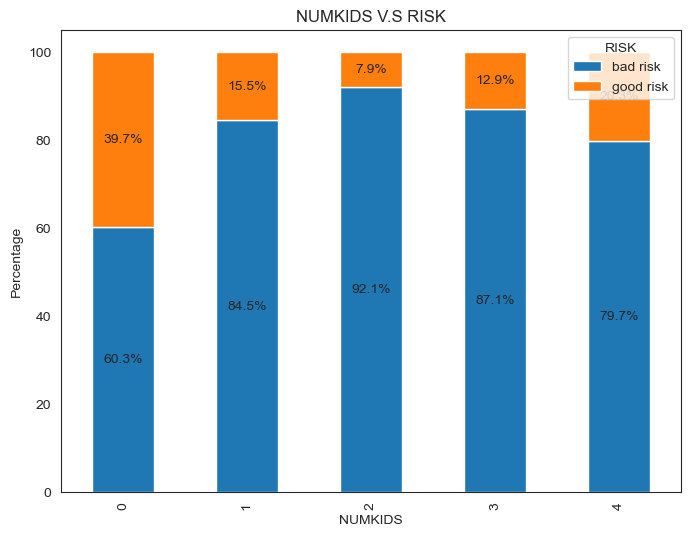

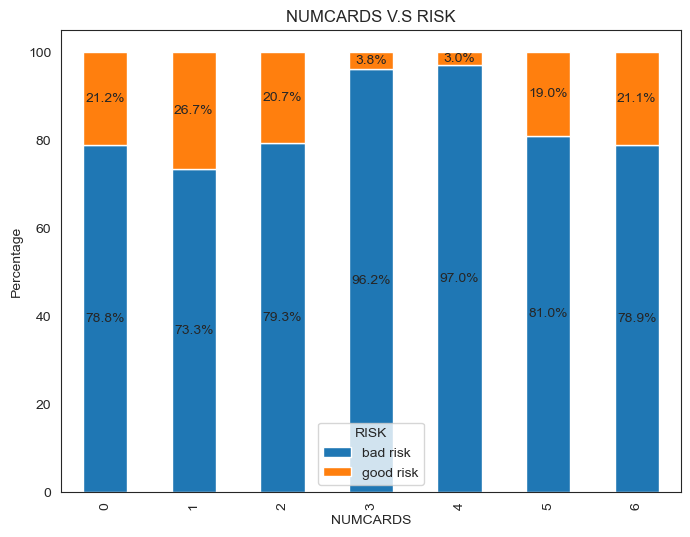

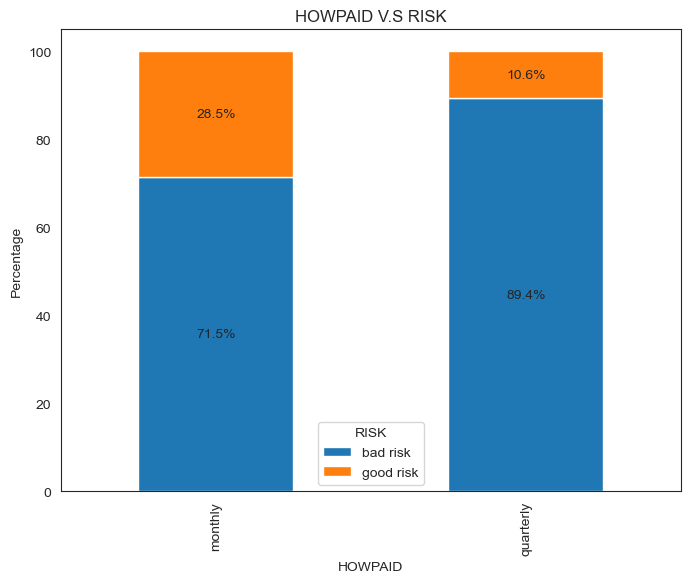

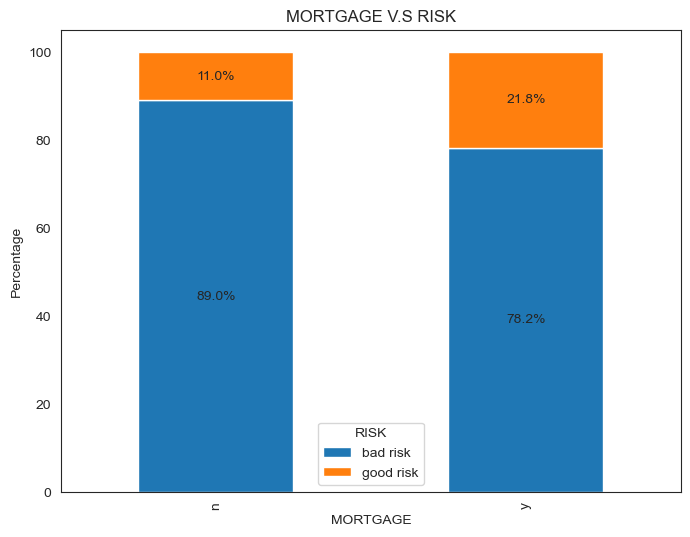

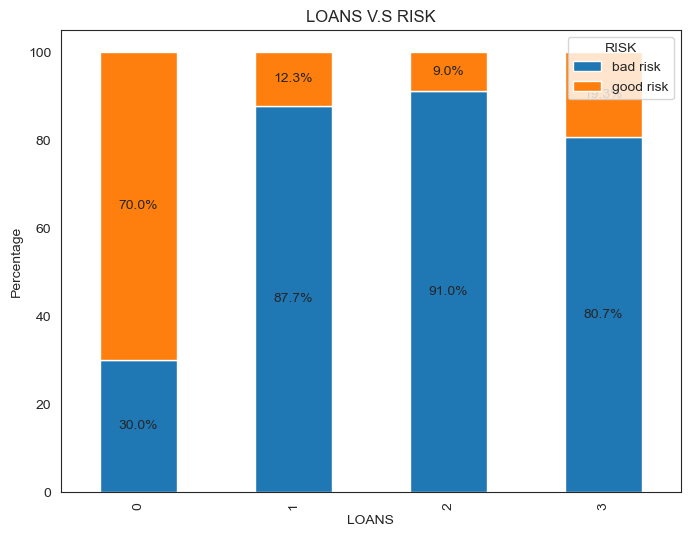

In [11]:
# Stacked bar plots for categorical variables
for var in categorical_vars1:
    # Calculate proportions
    proportions = data.groupby([var, 'RISK']).size().unstack().fillna(0)
    proportions['total'] = proportions.sum(axis=1)
    proportions = proportions.div(proportions['total'], axis=0) * 100
    proportions = proportions.drop('total', axis=1)
    
    # Create the stacked bar plot
    sns.set_style("white")
    tips = sns.load_dataset("tips")
    ax = proportions.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f"{var} V.S RISK")
    plt.ylabel("Percentage")
    plt.legend(title="RISK", loc="best")
    
    # Display the percentage values on the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", horizontalalignment='center', verticalalignment='center')

    plt.show()


# Models 

# TREE

In [9]:
data_cat = data.copy()

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
X = pd.get_dummies(data_cat.drop("RISK", axis=1), drop_first=True)
y = data_cat["RISK"]
X.head()

,AGE,INCOME,GENDER_m,MARITAL_married,MARITAL_single,NUMKIDS_1,NUMKIDS_2,NUMKIDS_3,NUMKIDS_4,NUMCARDS_1,NUMCARDS_2,NUMCARDS_3,NUMCARDS_4,NUMCARDS_5,NUMCARDS_6,HOWPAID_quarterly,MORTGAGE_y,LOANS_1,LOANS_2,LOANS_3
0,23,21035,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,35,53201,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,29,21002,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
3,23,20828,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,42,46965,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0


## Full Tree

In [12]:
from sklearn.model_selection import train_test_split
# Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [13]:
tree_full = DecisionTreeClassifier(criterion='entropy')#gini entropy
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

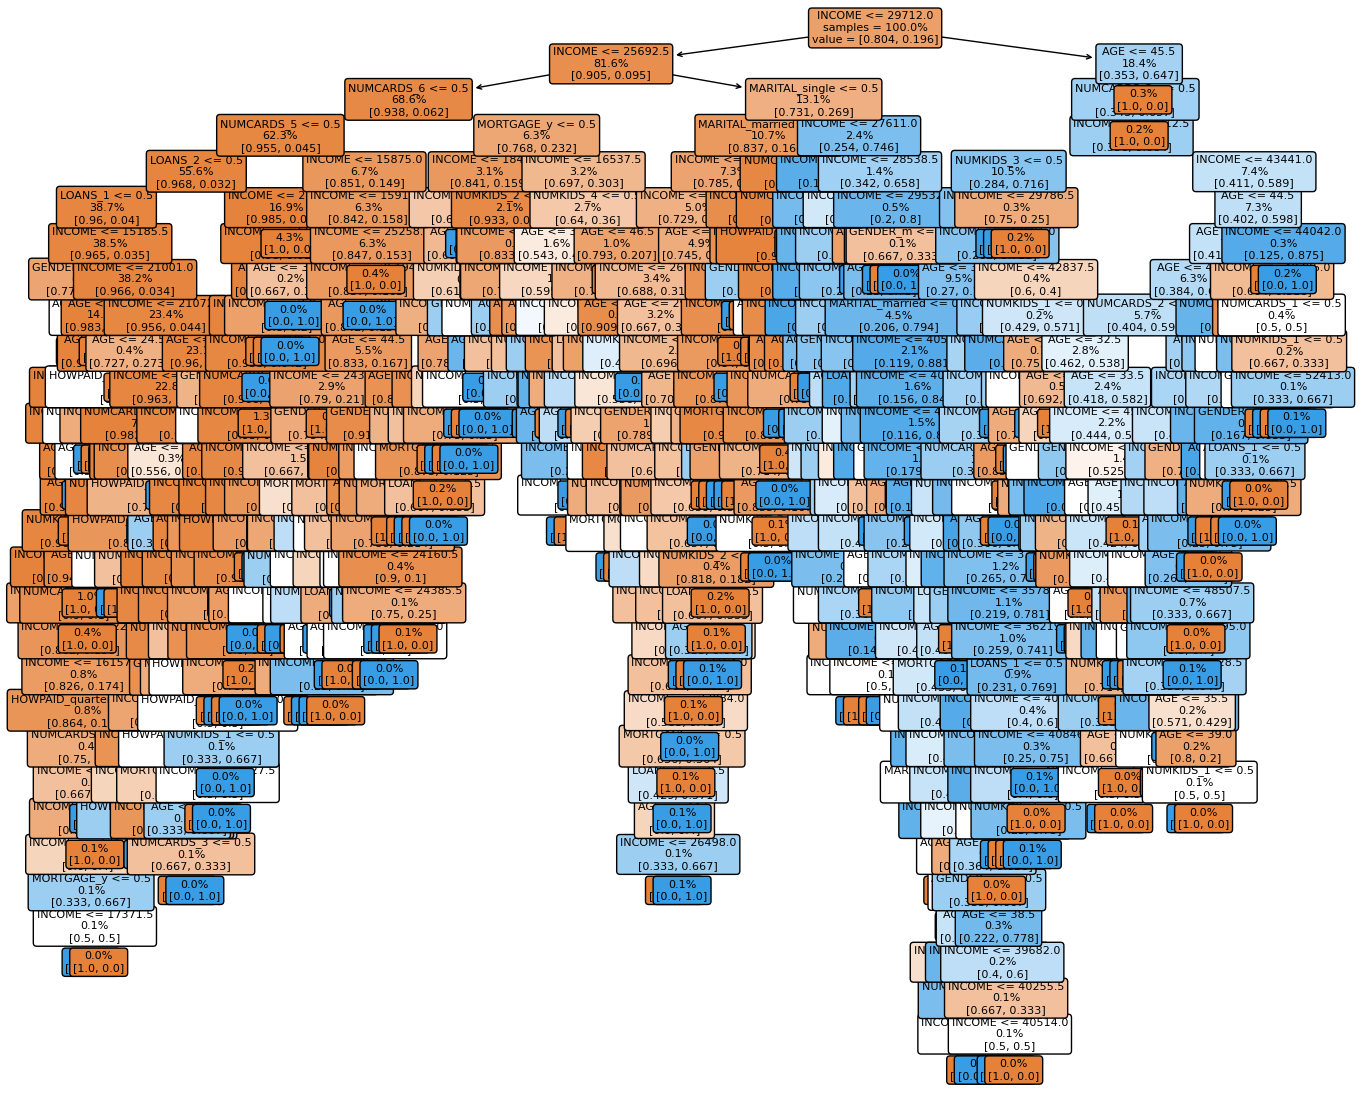

In [14]:
plt.figure(figsize=(16,14))
plot_tree(tree_full, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          filled=True, proportion=True, rounded=True, fontsize=8)
plt.show()

## Tuning and pruning the tree 

In [15]:
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [16]:
grid_alphas = ccp_alphas
grid_alphas = np.logspace(-5, 1, 100)

In [17]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)
tree_full = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = 0)
hyper_params = {"ccp_alpha": grid_alphas}
treeCV = GridSearchCV(estimator = tree_full,
                      param_grid = hyper_params,
                      cv = folds)

In [18]:
treeCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy'),
             param_grid={'ccp_alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923...
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01])})

In [19]:
pd.DataFrame(treeCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012328,0.004908,0.001328,0.000736,0.00001,{'ccp_alpha': 1e-05},0.865248,0.804270,0.811388,0.793594,0.782918,0.779359,0.814947,0.829181,0.775801,0.811388,0.806810,0.025477,66
1,0.008962,0.000372,0.000937,0.000005,0.000011,{'ccp_alpha': 1.1497569953977357e-05},0.868794,0.807829,0.790036,0.797153,0.797153,0.804270,0.811388,0.829181,0.779359,0.814947,0.810011,0.023571,51
2,0.009002,0.000419,0.000934,0.000003,0.000013,{'ccp_alpha': 1.3219411484660286e-05},0.861702,0.825623,0.811388,0.814947,0.790036,0.797153,0.807829,0.829181,0.782918,0.814947,0.813572,0.021237,41
3,0.008959,0.000357,0.000931,0.000003,0.000015,{'ccp_alpha': 1.5199110829529332e-05},0.854610,0.832740,0.800712,0.800712,0.786477,0.793594,0.811388,0.825623,0.793594,0.829181,0.812863,0.020744,42
4,0.008991,0.000350,0.000929,0.000013,0.000017,{'ccp_alpha': 1.747528400007683e-05},0.861702,0.814947,0.782918,0.811388,0.790036,0.797153,0.818505,0.825623,0.772242,0.807829,0.808234,0.023900,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.009368,0.000373,0.000933,0.000027,5.722368,{'ccp_alpha': 5.72236765935022},0.790780,0.811388,0.811388,0.782918,0.786477,0.832740,0.825623,0.804270,0.775801,0.814947,0.803633,0.018008,72
96,0.009422,0.000414,0.000993,0.000087,6.579332,{'ccp_alpha': 6.5793322465756825},0.790780,0.811388,0.811388,0.782918,0.786477,0.832740,0.825623,0.804270,0.775801,0.814947,0.803633,0.018008,72
97,0.009444,0.000394,0.001002,0.000081,7.564633,{'ccp_alpha': 7.56463327554629},0.790780,0.811388,0.811388,0.782918,0.786477,0.832740,0.825623,0.804270,0.775801,0.814947,0.803633,0.018008,72
98,0.009680,0.000356,0.001183,0.000086,8.69749,{'ccp_alpha': 8.697490026177835},0.790780,0.811388,0.811388,0.782918,0.786477,0.832740,0.825623,0.804270,0.775801,0.814947,0.803633,0.018008,72


In [20]:
resCV = treeCV.cv_results_

test_Misclasif = 1 - resCV["mean_test_score"]
std_mean_err_test = resCV["std_test_score"] / np.sqrt(10)
alpha_grid = resCV["param_ccp_alpha"].data

index_best = treeCV.best_index_
best_alpha = treeCV.best_params_["ccp_alpha"]
one_se_rule_best_alpha = np.max(alpha_grid[test_Misclasif <= test_Misclasif[index_best] + std_mean_err_test[index_best]])

print("Best alpha:", best_alpha)
print("Best 1se alpha:", one_se_rule_best_alpha)

Best alpha: 0.0030538555088334154
Best 1se alpha: 0.014174741629268049


In [21]:
tree_best = treeCV.best_estimator_

In [22]:
def round_tree_thresholds(tree, precision=0):
    for i in range(tree.tree_.node_count):
        if tree.tree_.children_left[i] != tree.tree_.children_right[i]:  # Not a leaf node
            tree.tree_.threshold[i] = round(tree.tree_.threshold[i], precision)
    return tree


In [23]:
tree_best_rounded = round_tree_thresholds(tree_best, precision=0)

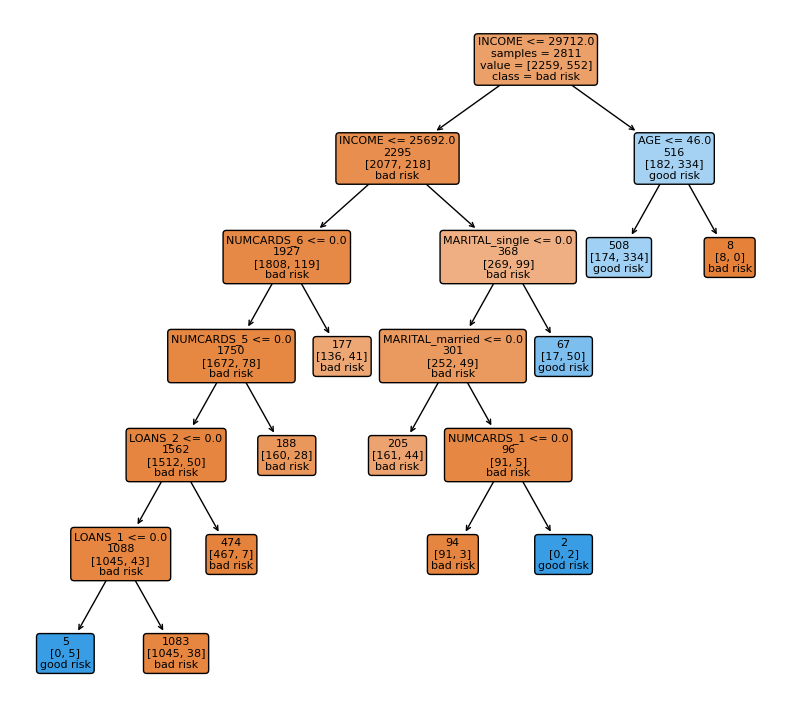

In [24]:
plt.figure(figsize=(10, 9))
plot_tree(tree_best_rounded, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          class_names=['bad risk', 'good risk'], filled=True, proportion=False, rounded=True, fontsize=8)
plt.show()

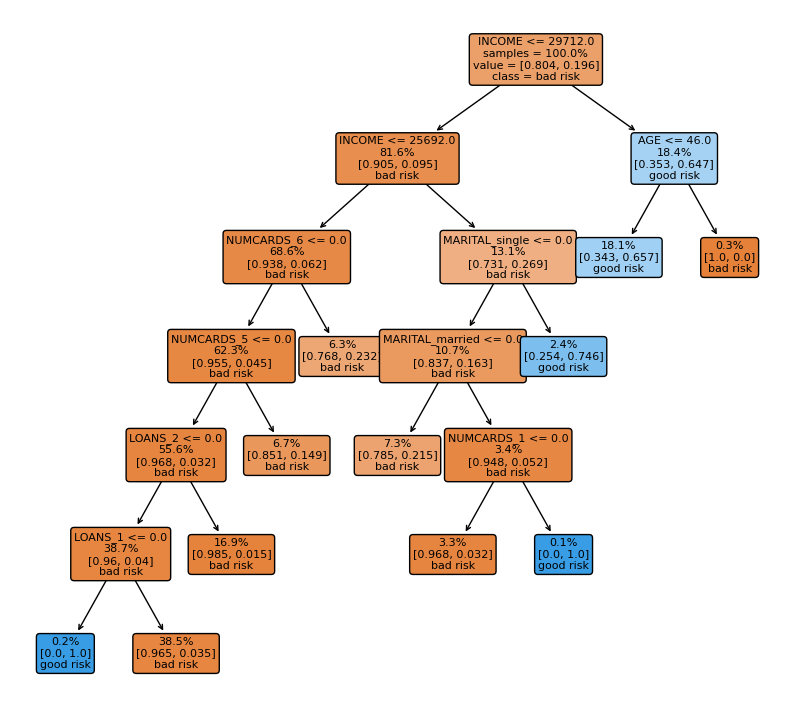

In [27]:
# propiton 
plt.figure(figsize=(10, 9))
plot_tree(tree_best_rounded, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          class_names=['bad risk', 'good risk'], filled=True, proportion=True, rounded=True, fontsize=8)
plt.show()

In [28]:
# Extract feature importances
feature_importances = tree_best_rounded.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

              Feature  Importance
1              INCOME    0.745309
4      MARITAL_single    0.080081
14         NUMCARDS_6    0.060045
13         NUMCARDS_5    0.034714
17            LOANS_1    0.030910
0                 AGE    0.015888
3     MARITAL_married    0.014052
9          NUMCARDS_1    0.011947
18            LOANS_2    0.007055
12         NUMCARDS_4    0.000000
16         MORTGAGE_y    0.000000
15  HOWPAID_quarterly    0.000000
10         NUMCARDS_2    0.000000
11         NUMCARDS_3    0.000000
8           NUMKIDS_4    0.000000
7           NUMKIDS_3    0.000000
6           NUMKIDS_2    0.000000
5           NUMKIDS_1    0.000000
2            GENDER_m    0.000000
19            LOANS_3    0.000000


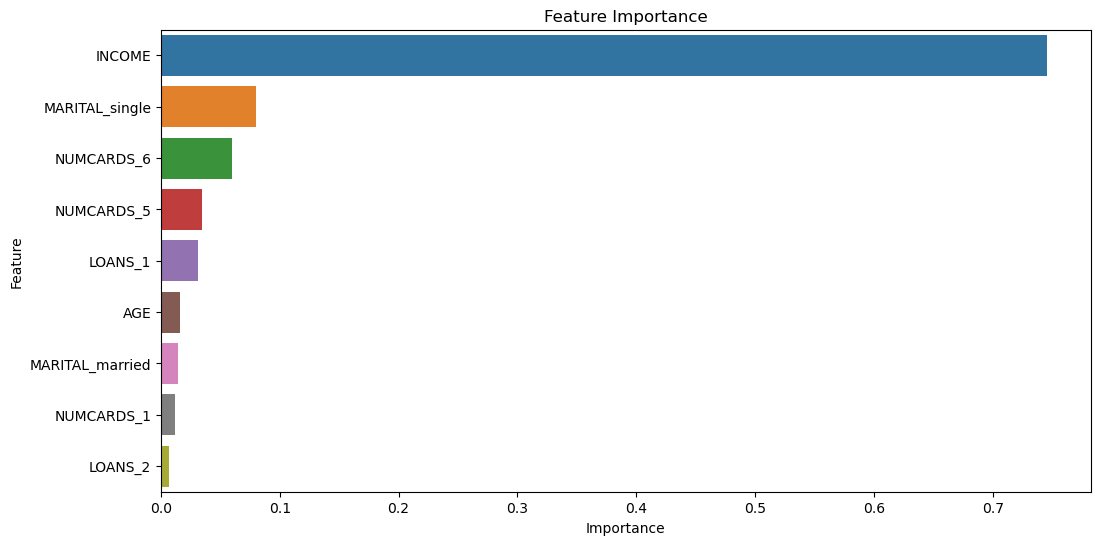

In [29]:
# Filter the features with non-zero importance
non_zero_importance_df = feature_importances_df.query('Importance > 0')

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=non_zero_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_train_pred_tree = tree_best.predict(X_train)
y_test_pred_tree = tree_best.predict(X_test)

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f"TREE training accuracy: {train_accuracy_tree:.2f}")
print(f"TREE testing accuracy: {test_accuracy_tree:.2f}")

# Print classification report
print("\nClassification report:")
print(classification_report(y_test, y_test_pred_tree))

# Print confusion matrixb ,
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_test_pred_tree))

TREE training accuracy: 0.87
TREE testing accuracy: 0.86

Classification report:
              precision    recall  f1-score   support

    bad risk       0.92      0.92      0.92       979
   good risk       0.64      0.64      0.64       227

    accuracy                           0.86      1206
   macro avg       0.78      0.78      0.78      1206
weighted avg       0.87      0.86      0.86      1206


Confusion matrix:
[[897  82]
 [ 81 146]]


/Users/mahmoudalkheja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

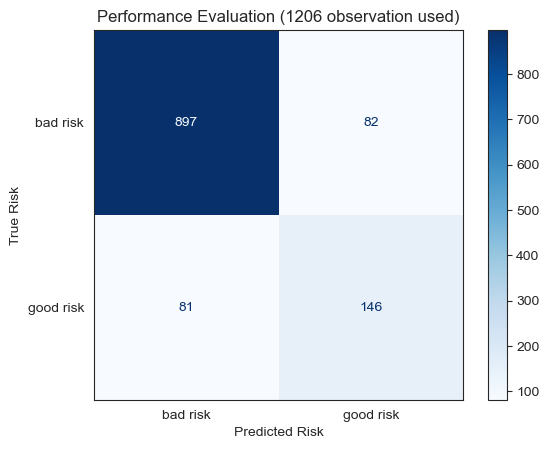

In [33]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set_style("white")
tips = sns.load_dataset("tips")
plot_confusion_matrix(tree_best, X_test, y_test, display_labels=['bad risk', 'good risk'], cmap=plt.cm.Blues, normalize=None)
plt.title("Performance Evaluation (1206 observation used)")
plt.xlabel("Predicted Risk")
plt.ylabel("True Risk")
plt.show()


# Boosting 

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbct = GradientBoostingClassifier(max_depth = 2, n_estimators = 1000, learning_rate = 0.01)
gbct.fit(X_train, y_train)
gbct.score(X_test, y_test)

0.8606965174129353

## Tuning 

In [35]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingClassifier

gbct = GradientBoostingClassifier(random_state=42)

# Create a hyperparameter grid
hyperparam_grid={
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1]
}

In [36]:
# Initialize best_score
best_score = 0.5

# Iterate over the parameter grid
for g in ParameterGrid(hyperparam_grid):
    gbct.set_params(**g)
    gbct.fit(X_train, y_train)
    
    # Get the accuracy score on the validation set
    score = gbct.score(X_test, y_test)

    # Save the best score and best parameters
    if score > best_score:
        best_score = score
        best_params = g

# Print the best score and best parameters
print(f"Best accuracy score: {best_score:.5f}")
print("Best parameters:", best_params)

Best accuracy score: 0.87065
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [37]:
# Instantiate a Gradient Boosting Classifier with the best parameters
best_gbct = GradientBoostingClassifier(**best_params, random_state=42)

# Fit the model with the best parameters on the entire training dataset
best_gbct.fit(X_train, y_train)

# Now you can use 'best_gbct' for making predictions, evaluating the model, etc.


GradientBoostingClassifier(max_depth=4, random_state=42)

In [39]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_train_pred_boos = best_gbct.predict(X_train)
y_test_pred_boos = best_gbct.predict(X_test)

train_accuracy_boos = accuracy_score(y_train, y_train_pred_boos)
test_accuracy_boos = accuracy_score(y_test, y_test_pred_boos)

print(f" Boosting training accuracy: {train_accuracy_boos:.2f}")
print(f" Boosting testing accuracy: {test_accuracy_boos:.2f}")

# Print classification report
print("\nClassification report:")
print(classification_report(y_test, y_test_pred_boos))

# Print confusion matrixb
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_test_pred_boos))

 Boosting training accuracy: 0.91
 Boosting testing accuracy: 0.87

Classification report:
              precision    recall  f1-score   support

    bad risk       0.90      0.94      0.92       979
   good risk       0.69      0.56      0.62       227

    accuracy                           0.87      1206
   macro avg       0.80      0.75      0.77      1206
weighted avg       0.86      0.87      0.87      1206


Confusion matrix:
[[922  57]
 [ 99 128]]


/Users/mahmoudalkheja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

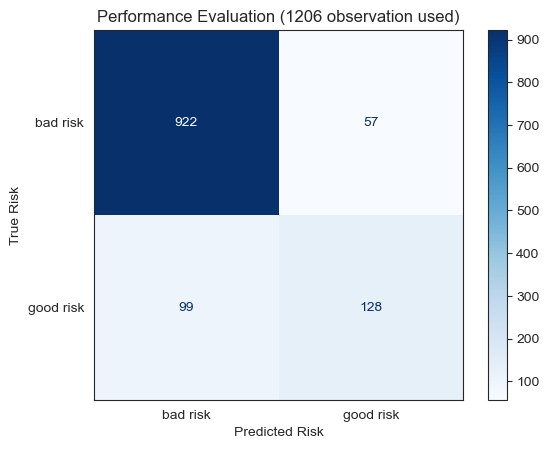

In [40]:
# Plot confusion matrix
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set_style("white")
tips = sns.load_dataset("tips")
plot_confusion_matrix(best_gbct, X_test, y_test, display_labels=['bad risk', 'good risk'], cmap=plt.cm.Blues, normalize=None)
plt.title("Performance Evaluation (1206 observation used)")
plt.xlabel("Predicted Risk")
plt.ylabel("True Risk")
plt.show()


              Feature  Importance
1              INCOME    0.753974
4      MARITAL_single    0.080887
0                 AGE    0.041531
14         NUMCARDS_6    0.023328
17            LOANS_1    0.019415
3     MARITAL_married    0.014594
13         NUMCARDS_5    0.011173
9          NUMCARDS_1    0.008730
7           NUMKIDS_3    0.008038
2            GENDER_m    0.007837
16         MORTGAGE_y    0.004807
10         NUMCARDS_2    0.003973
15  HOWPAID_quarterly    0.003697
5           NUMKIDS_1    0.003532
18            LOANS_2    0.003177
19            LOANS_3    0.002974
11         NUMCARDS_3    0.002672
12         NUMCARDS_4    0.002531
6           NUMKIDS_2    0.002032
8           NUMKIDS_4    0.001098


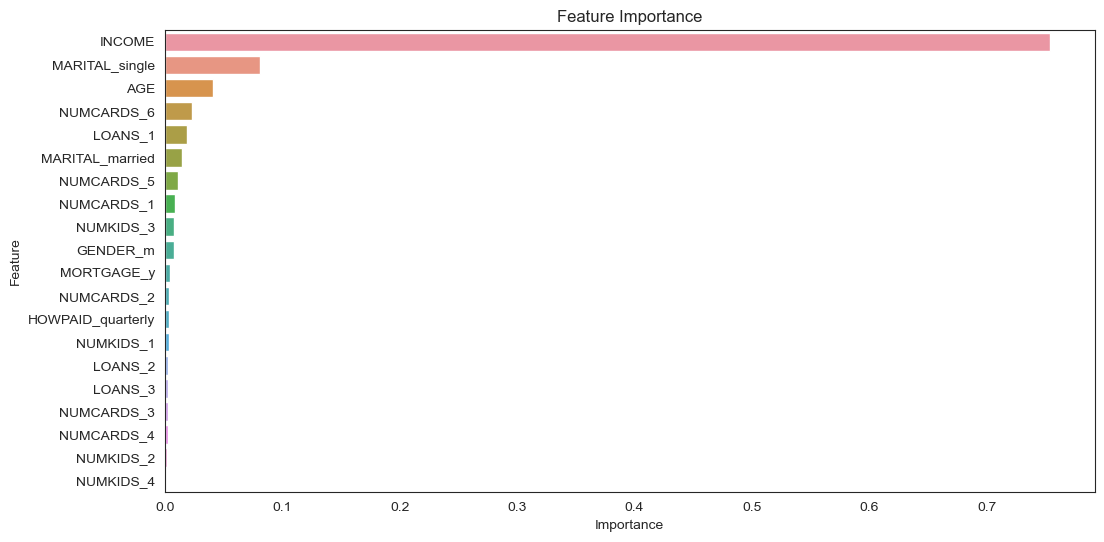

In [55]:


# Extract feature importances
feature_importances = best_gbct.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

# Filter the features with non-zero importance
non_zero_importance_df = feature_importances_df.query('Importance > 0')

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=non_zero_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

